# Estera de Pantalla Azul

## Objetivo:
A parir de una fotografía tomada en un fondo verde o azul donde haya un objeto. Obtener el objeto y colocarlo en otro fondo.

## Teoría

### Umbrales de Color
Al tratar las imágenes como cuadrículas de píxeles en función de X e Y se utiliza esa información de colores para poder aislar un área en particular, seleccionando una área de interés (ROI). Esto se puede realizar utlizando _Umbrales de Color_.

Con la técnica de _Umbrales de Color_ podemos eliminar partes de una imagen que se encuentran dentro de un rango de color específico. El uso común es con pantalla azul/verde.

## ¿Cómo se logra hacer esto?

- Paso #1: vamos a importar tres librerías que necesitaremos para desarrollar este ejercicio. La primera es OpenCV que se usa para el trabajo con imágenes, luego matplotlib que nos sirve para poder visualizar las imágenes y por último numpy que son funciones matemáticas que nos pueden ser útiles como el manejo de matrices.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

- Paso #2: ahora necesitamos una imagen con el fondo de color azul o verde para trabajar. Vamos a utilizar una de un perrito navideño que sera nuestro objeto de interés. 


In [11]:
image = cv2.imread('./Resources/chrismast_dog.jpg')

# Ver característicaas de la imagen.abs
print('Image type: ', type(image),
      'Image Dimensions : ', image.shape)

Image type:  &lt;class &#39;numpy.ndarray&#39;&gt; Image Dimensions :  (481, 855, 3)


__Nota__: como bien sabemos OpenCV trabaja las imágenes como un array donde se manejan filas y columnas. Los valores que se obtuvieron antes se pueden leer de la siguiente manera _(height in pixeles, width in pixeles, colour componentes for RGB)_.

- Paso #3: Open CV lee las imágenes en color como imágenes BGR (azul, verde, rojo), no como RGB (rojo, azul, verde). Por lo tanto, los colores rojo y azul están en orden inverso y pyplot reflejan este cambio y dan como resultado una imagen de color diferente al original. 

Entonces, antes de mostrar la imagen, se realiza una copia de la imagen original y se utiliza Open CV para cambiar el color de BGR a RGB.

&lt;matplotlib.image.AxesImage at 0xdc67040&gt;

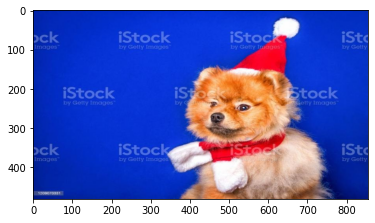

In [12]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Crear el umbral de color
Para crear un Umbral de color, necesitamos definir límites upper y lower para el color que necesitamos aislar y eliminar "azul".

Se utilizan los valores de umbral de color para finalmente seleccionar el área de la pantalla azul que contiene este rango de valores de color y deshacernos de él.

- Paso #1: definir los valores inferior y superior para el color que necesitamos aislar.

In [13]:
lower_blue = np.array([0, 0, 100])     ## [R value, G value, B value]
upper_blue = np.array([120, 100, 255]) 

__Nota__:
Usaremos el límite de color que se acaba de crear para crear una máscara de imagen.
Las máscaras son una forma muy común de aislar un área seleccionada de interés y hacer algo con esa área. Podemos crear una máscara sobre el área azul usando la función inRange () de Open CV.

- Paso #2: creadon una mascara. 

Usaremos el límite de color que se acaba de crear para crear una máscara de imagen.
Las máscaras son una forma muy común de aislar un área seleccionada de interés y hacer algo con esa área. Podemos crear una máscara sobre el área azul usando la función inRange () de Open CV.

__Nota__: La función inRange () toma una imagen en nuestros límites de color inferior y superior y define una máscara preguntando si el valor de color de cada píxel de la imagen se encuentra en el rango de los umbrales de color inferior y superior. Si cae en este rango, se permitirá que se muestre la máscara y, de lo contrario, la bloqueará y volverá el píxel negro.


&lt;matplotlib.image.AxesImage at 0xef4c1d8&gt;

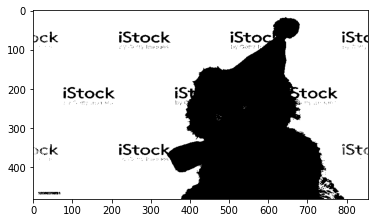

In [14]:
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

- Paso #3: Podemos visualizar también la mascara de manera contraria.

&lt;matplotlib.image.AxesImage at 0xefb2bc8&gt;

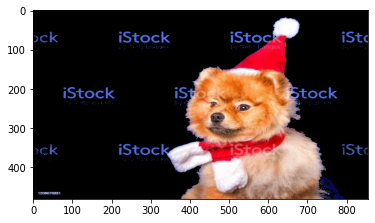

In [16]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

### Mascara y añadir un nuevo fondo.
- Paso #1: cargamos la imagen que utilizaremos como fondo.

In [19]:
background_image = cv2.imread('./Resources/konaha.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
print('Image type: ', type(background_image),
      'Image Dimensions : ', background_image.shape)

Image type:  &lt;class &#39;numpy.ndarray&#39;&gt; Image Dimensions :  (1080, 1920, 3)


- Paso #2: aplicaremos el fondo para ellos es necesario indicar el tamaño en pixeles de la imagen.

&lt;matplotlib.image.AxesImage at 0xd9e8b80&gt;

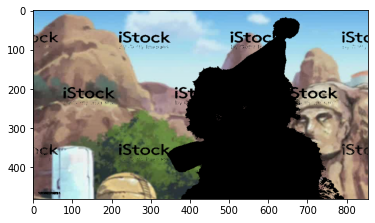

In [27]:
crop_background = background_image[0:481, 0:855]
crop_background[mask == 0] = [0, 0, 0]
plt.imshow(crop_background)

- Paso #3: 
Luego, finalmente, solo necesitamos sumar estas dos imágenes. Dado que el área negra es equivalente a ceros en el valor del color de los píxeles, una simple adición funcionará.

&lt;matplotlib.image.AxesImage at 0xda19688&gt;

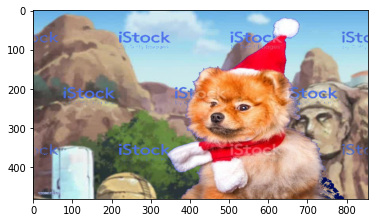

In [28]:
final_image = crop_background + masked_image
plt.imshow(final_image)